# **Sendy Logistics Challenge by EXPLORE Data Science Academy**

## **Team 21**
Sibusiso Luthuli, Nelisiwe Phiwe Mabanga, Abel Marumo, Itumeleng Ngoetjana and Caryn Pialat

# Introduction

Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to 320% and the inability to communicate an accurate delivery time has a negative impact on the relationship between the company and its customers. In reality, economies are better when logistics is efficient and affordable. To that end, Sendy has intiated a project aimed at accurately predicting the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination. The company has provided historical data with which to develop a solution to the logistics problem with the goal of ensuring effective communication, improved customer relations, cost-efficient services, improved resource management, informed order scheduling and reduced costs for business by finding an effective way of predicting accurate time of arrival to esure that businesses are being better with good logistics.

# Problem statement

Use historical data to build a model that will best predict an accurate time of arrival of a package at its destination.

# Import data and libraries 


In [80]:
pip install pygeohash

In [81]:
pip install polygon_geohasher

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import folium
import pygeohash as pgh
from polygon_geohasher.polygon_geohasher import geohash_to_polygon
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from textwrap import wrap
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/carynpialat/regression_predict/master/Train.csv')
riders = pd.read_csv('https://raw.githubusercontent.com/carynpialat/regression_predict/master/Riders.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/carynpialat/regression_predict/master/Test.csv')

# Data Evaluation

1. Checking summary statistics of all the data
2. Checking the percentage of missing data

In [84]:
df.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


In [85]:
riders.head(2)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176


In [86]:
test_data.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868


In [87]:
df.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [88]:
riders.describe()

,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,960.000000,960.000000,960.000000,960.000000
mean,1864.851042,1200.234375,13.412604,427.983333
std,1880.337785,810.930171,2.675794,486.957931
min,2.000000,96.000000,0.000000,0.000000
25%,261.750000,478.250000,13.500000,30.000000
50%,1475.500000,1021.000000,14.000000,223.000000
75%,2847.250000,1891.500000,14.300000,678.750000
max,9756.000000,3764.000000,15.200000,2298.000000


In [89]:
test_data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long
count,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,7068.000000,5631.000000,199.000000,7068.000000,7068.000000,7068.000000,7068.000000
mean,2.752122,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,15.621817,3.249859,9.458970,23.246120,6.651759,-1.282043,36.811148,-1.282255,36.811326
std,0.624000,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,8.776650,1.580926,5.575689,3.591161,14.085439,0.030044,0.037962,0.034236,0.043507
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.200000,0.100000,-1.433512,36.653828,-1.422652,36.639195
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.100000,-1.301201,36.784605,-1.300921,36.786546
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.400000,2.900000,-1.281301,36.807219,-1.283219,36.807927
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,25.900000,4.950000,-1.257274,36.829716,-1.261256,36.828195
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,47.000000,32.100000,99.100000,-1.148352,36.991046,-1.030225,37.018958


In [90]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [91]:
riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rider Id        960 non-null    object 
 1   No_Of_Orders    960 non-null    int64  
 2   Age             960 non-null    int64  
 3   Average_Rating  960 non-null    float64
 4   No_of_Ratings   960 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [92]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

Through this superficial evaluation of the data, we have identified the shape and contents of the three datasets. The summary statistics give us basic description of the contents. Notably, the training and test sets both include columns with missing data, namely 'Precipitation in millimeters' and 'Temperature'. These will be addressed during data processing.

In [0]:
#Merge training data with rider data
df = pd.merge(df, riders, how='left', left_on=['Rider Id'], right_on=['Rider Id'])

# Data Preprocessing

1. Drop columns with high percentage of missing values and univariate columns
2. Remove columns from the training data that are absent in the test data (except the dependent variable)
3. One hot encode categorical variables
4. Label encode categorical variables with large number of categories
5. Transform time columns to 24 hour format
6. Fill in missing temperature values

In [94]:
#1: Drop columns that have more than 50% missing data
col_names = list(df.columns)
for i in range(len(col_names)):
    if (sum(df[col_names[i]].isna()) / len(df) * 100) > 50:
        print('Column dropped: ' + col_names[i])
        df = df.drop(col_names[i], axis=1)

Column dropped: Precipitation in millimeters


In [0]:
#1: Given only one vehicle type
df = df.drop('Vehicle Type', axis=1)

In [0]:
#2: Delete attributes that are absent from test data except for the dependent variable
df = df.drop([col for col in df.columns if 'Arrival at Destination' in col], axis=1)

In [0]:
#3: One hot encode 'Personal or Business' and 'Platform Type' columns. Drop first column to avoid the dummy variable trap
pb = df['Personal or Business']
pt = df['Platform Type']

df = pd.get_dummies(df, columns=['Personal or Business'], drop_first=True)
df = pd.get_dummies(df, columns=['Platform Type'], drop_first=True)

In [0]:
#4: Label encode 'Id' columns
le = LabelEncoder()
le.fit(df['User Id'])
df['User Id'] = le.transform(df['User Id'])

le2 = LabelEncoder()
le2.fit(df['Rider Id'])
df['Rider Id'] = le2.transform(df['Rider Id'])

In [0]:
#5: Label encode latitude and longitude columns

#Transform latitude and longitude into geohashes which encodes a geographic location into a short string of letters and digits.
#We selected this method as a way of categorising locations that are close together but do not share coordinates. We selected 
#precision = 6 to divide the area where pickups and deliveries occur into 1200 m x 609.4 m bins.
#Provides approximate area sizes: https://www.elastic.co/guide/en/elasticsearch/reference/current/search-aggregations-bucket-geohashgrid-aggregation.html

geo_df = df.loc[:, ['Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long']]
geo_df['pickup'] = 0
geo_df['dest'] = 0
for i in range(len(geo_df)):
    geo_df.iloc[i, 4] = pgh.encode(geo_df.iloc[i, 0], geo_df.iloc[i, 1], precision=6)
    geo_df.iloc[i, 5] = pgh.encode(geo_df.iloc[i, 2], geo_df.iloc[i, 3], precision=6)

# Make a dictionary of geohash labels

labels = list(set(list(geo_df['pickup']) + list(geo_df['dest'])))
vals = [i + 1 for i in list(range(0, len(labels)))]
geohash_dict = dict(zip(labels, vals))

#Transform geohash labels using the dictionary
geo_df['pickup_label'] = geo_df['pickup'].apply(lambda i: geohash_dict[i] if i in geohash_dict.keys() else 0)
geo_df['dest_label'] = geo_df['dest'].apply(lambda i: geohash_dict[i] if i in geohash_dict.keys() else 0)

#Add to df
df['pickup_geohash'] = geo_df['pickup_label']
df['dest_geohash'] = geo_df['dest_label']

In [0]:
#5: Transform time columns into 24 hour format

df['Placement - Time'] = pd.to_datetime(df['Placement - Time'], format='%I:%M:%S %p')
df['Confirmation - Time'] = pd.to_datetime(df['Confirmation - Time'], format='%I:%M:%S %p')
df['Arrival at Pickup - Time'] = pd.to_datetime(df['Arrival at Pickup - Time'], format='%I:%M:%S %p')
df['Pickup - Time'] = pd.to_datetime(df['Pickup - Time'], format='%I:%M:%S %p')

In [0]:
#6: Fill in missing temperature values

#We have elected to fill in the missing values with the average temperature per hour. The relationship between temperature and time of day is well established
#(https://www.globe.gov/explore-science/scientists-blog/archived-posts/sciblog/2008/02/27/how-the-temperature-varies-during-the-day-and-night/comment-page-1/index.html).

#Calculate mean temperature per hour
temp_adj = df.loc[:, ['Temperature', 'Placement - Time']]
temp_adj['hour'] = temp_adj['Placement - Time'].apply(lambda x: x.hour)
mean_temps = temp_adj.drop(temp_adj[temp_adj['Temperature'].isna()].index)
mean_temps = mean_temps.groupby(['hour'], as_index=False).mean()

#Replace nan Temperatures with mean per hour
a = df['Temperature'].isna()
for i in range(len(a)):
    if a.iloc[i] == True:
        temp_adj.iloc[i, 0] = mean_temps.loc[mean_temps['hour'] == temp_adj.iloc[i, 2], 'Temperature'].values[0]

df['Temperature'] = temp_adj['Temperature']

# Feature Engineering

In [0]:
#Calculate interval in seconds between successive time columns. This format is the same as the given dependent variable, 'Time from Pickup to Arrival'
df['time_Con - Pl'] = (df['Confirmation - Time'] - df['Placement - Time']).astype('timedelta64[s]').astype(np.int64)
df['time_Arr P - Con'] = (df['Arrival at Pickup - Time'] - df['Confirmation - Time']).astype('timedelta64[s]').astype(np.int64)
df['time_P - Arr P'] = (df['Pickup - Time'] - df['Arrival at Pickup - Time']).astype('timedelta64[s]').astype(np.int64)

In [0]:
#Calculate time in seconds from midnight. This was done because it is the easiest time format to transform into a numeric value and it is the
#same unit of measurement as used for the dependent variable.
df['pl'] = df['Placement - Time']. apply(lambda x: (x - pd.to_datetime('12:00:00 AM', format='%I:%M:%S %p')).total_seconds())
df['con'] = df['Confirmation - Time']. apply(lambda x: (x - pd.to_datetime('12:00:00 AM', format='%I:%M:%S %p')).total_seconds())
df['arr p'] = df['Arrival at Pickup - Time']. apply(lambda x: (x - pd.to_datetime('12:00:00 AM', format='%I:%M:%S %p')).total_seconds())
df['p'] = df['Pickup - Time']. apply(lambda x: (x - pd.to_datetime('12:00:00 AM', format='%I:%M:%S %p')).total_seconds())

In [0]:
#Extract hour that rider picked up the shipment
df['pickup_hour'] = df['Placement - Time'].apply(lambda x: x.hour)

In [0]:
#sin/cos transformation of time values
#These transformations were performed to change time features into cylindrical, continuous variables, eg. a method that allows machine learning algorithms
#to understand that 23:00 is close to 00:00.
#https://medium.com/ai%C2%B3-theory-practice-business/top-6-errors-novice-machine-learning-engineers-make-e82273d394db
#https://datascience.stackexchange.com/questions/26623/how-to-use-hours-of-the-day-as-a-continuous-feature
ls = ['pl', 'con', 'arr p', 'p', 'pickup_hour']
ls_sin = ['pl_sin', 'con_sin', 'arr p_sin', 'p_sin', 'hr_sin']
ls_cos = ['pl_cos', 'con_cos', 'arr p_cos', 'p_cos', 'hr_cos']
for i in range(len(ls)):
    df[ls_sin[i]] = df[ls[i]].apply(lambda x: np.sin(x*(2.*np.pi/86400)))
    df[ls_cos[i]] = df[ls[i]].apply(lambda x: np.cos(x*(2.*np.pi/86400)))

#sin/cos transform 'Weekday'
ls = ['Placement - Weekday (Mo = 1)', 'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)']
ls_sin = ['weekday_pl_sin', 'weekday_con_sin', 'weekday_arr p_sin', 'weekday_p_sin']
ls_cos = ['weekday_pl_cos', 'weekday_con_cos', 'weekday_arr p_cos', 'weekday_p_cos']
for i in range(len(ls)):
    df[ls_sin[i]] = df[ls[i]].apply(lambda x: np.sin(x*(2.*np.pi/7)))
    df[ls_cos[i]] = df[ls[i]].apply(lambda x: np.cos(x*(2.*np.pi/7)))

#sin/cos transform 'Day of Month' (use 31 days of the month because we cannot distinguish months from this data)
ls = ['Placement - Day of Month', 'Confirmation - Day of Month', 'Arrival at Pickup - Day of Month', 'Pickup - Day of Month']
ls_sin = ['month_pl_sin', 'month_con_sin', 'month_arr p_sin', 'month_p_sin']
ls_cos = ['month_pl_cos', 'month_con_cos', 'month_arr p_cos', 'month_p_cos']
for i in range(len(ls)):
    df[ls_sin[i]] = df[ls[i]].apply(lambda x: np.sin(x*(2.*np.pi/31)))
    df[ls_cos[i]] = df[ls[i]].apply(lambda x: np.cos(x*(2.*np.pi/31)))

In [0]:
#Calculate average speed of riders for each delivery (s = d / t)
df['speed (km/h)'] = df['Distance (KM)'] / (df['Time from Pickup to Arrival'] / 3600)

In [0]:
#Rank riders by rating and calculate average number of deliveries per day for each rider.
#This weighted ranking was performed to facilitate the selection of the 'best' rider. The reason for doing this is
#that a rider with a single rating of 14.5 should not be ranked above a rider with an average rating of 14.2 from thousands
# of ratings because it is arguably more difficult to achieve the latter.
total = sum(riders['No_of_Ratings'])
df['ranking'] = df['Average_Rating'] * df['No_of_Ratings'] / total
df['deliveries_per_day'] = df['No_Of_Orders'] / df['Age']

# Exploratory Data Analysis

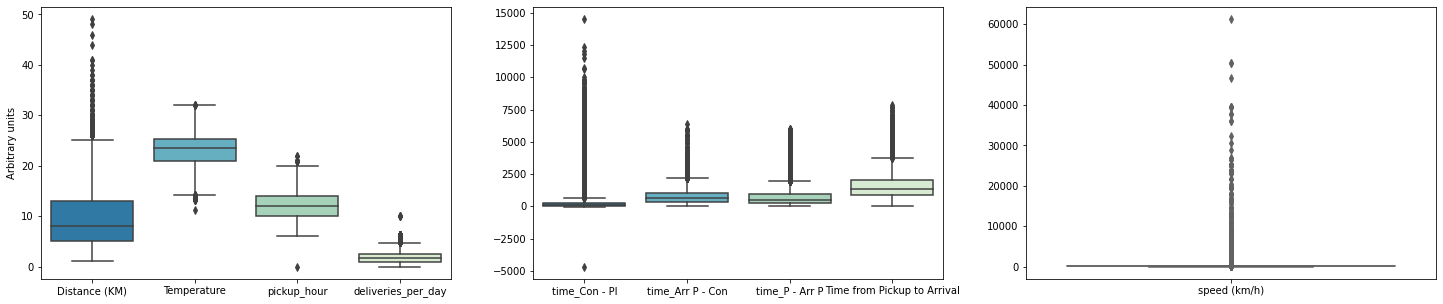

In [108]:
#Investigate distribution of numeric columns
#Divide variables to get a clearer view of the data distrubtions
numeric_cols_A = ['Distance (KM)', 'Temperature', 'pickup_hour', 'deliveries_per_day']
x = df[numeric_cols_A]

plt.subplot(1,3,1)
sns.boxplot(x="variable", y="value", data=pd.melt(x), palette='GnBu_r')
#plt.title('Number of deliveries per hour')
plt.xlabel('')
plt.ylabel('Arbitrary units')
fig = plt.gcf()
fig.set_size_inches(25, 5)

numeric_cols_A = ['time_Con - Pl', 'time_Arr P - Con', 'time_P - Arr P', 'Time from Pickup to Arrival']
x = df[numeric_cols_A]

plt.subplot(1,3,2)
sns.boxplot(x="variable", y="value", data=pd.melt(x), palette='GnBu_r')
#plt.title('Number of deliveries per hour')
plt.xlabel('')
plt.ylabel('')
fig = plt.gcf()
fig.set_size_inches(25, 5)

numeric_cols_A = ['speed (km/h)']
x = df[numeric_cols_A]

plt.subplot(1,3,3)
sns.boxplot(x="variable", y="value", data=pd.melt(x), palette='GnBu_r')
#plt.title('Number of deliveries per hour')
plt.xlabel('')
plt.ylabel('')
fig = plt.gcf()
fig.set_size_inches(25, 5)

Fig 1. Investigate distribution of numeric columns in the dataset. Many variables show a skewness in the data that are subsequently explored.

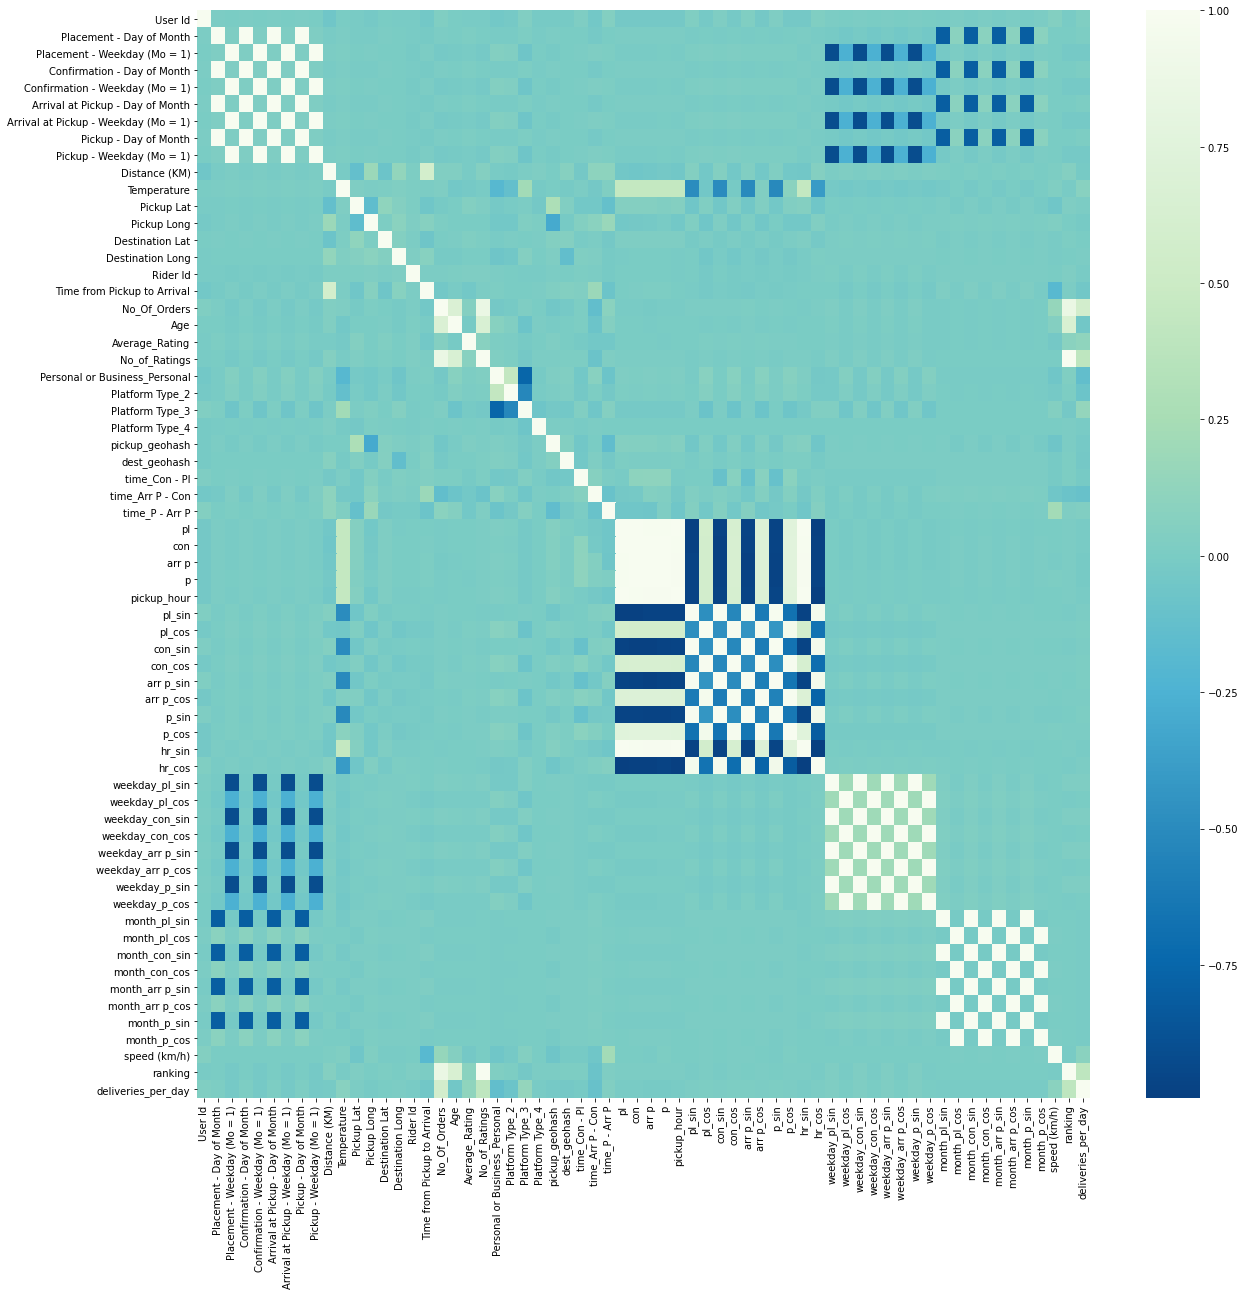

In [109]:
#Examine overall relationship between variables
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=False,cmap="GnBu_r")
plt.show()

Fig 2. Heatmap displaying the relationship between the different variables in the training dataset. A number of the clusters showing very high or low correlation between the features are expected, such as the relationships between the sin/cos transformed time columns and the relationship between temperature and time.

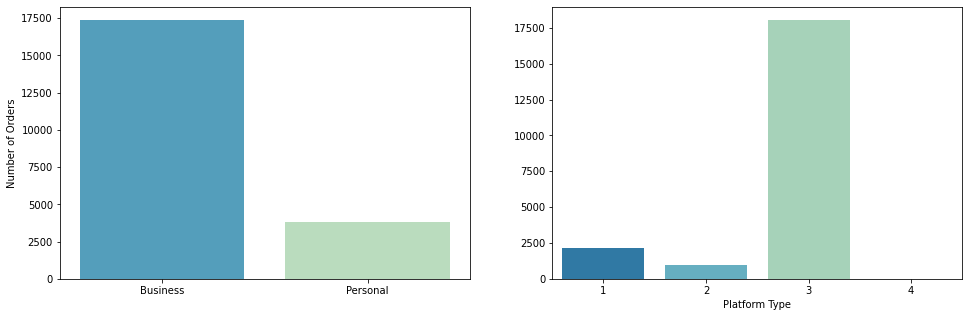

In [110]:
#Investigate distribution of categorical columns
plt.subplot(1,3,1)

sns.countplot(x=pb, palette='GnBu_r')
plt.xlabel('')
plt.ylabel('Number of Orders')
fig = plt.gcf()
fig.set_size_inches(25, 5)

plt.subplot(1,3,2)
sns.countplot(x=pt, palette='GnBu_r')
plt.xlabel('Platform Type')
plt.ylabel('')
fig = plt.gcf()
fig.set_size_inches(25, 5)

plt.show()

Fig 3. Bar graphs showing the total number of orders placed by use and by platform.

In [111]:
#Draw interactive map showing geohash grid and deliveries

lat, lng = (-1.28333, 36.8166695) #Coordinates for Nairobi, Kenya
m = folium.Map((lat, lng), zoom_start=12)

#Transform geohashes to polygons that can be drawn on the map
geohash_bins = list(map(lambda a: geohash_to_polygon(a), labels))

for i in range(len(geohash_bins)):
  folium.Choropleth(geohash_bins[i], fill_color='grey', fill_opacity=0.3, line_opacity=0.3).add_to(m)

#Draw heatmap showing delivery areas on the map
from folium.plugins import HeatMap

geo_df['Pickup Lat'] = geo_df['Pickup Lat'].astype(float)
geo_df['Destination Lat'] = geo_df['Destination Lat'].astype(float)

heat_df = geo_df[['Destination Lat', 'Destination Long']]
heat_data = [[row['Destination Lat'],row['Destination Long']] for index, row in heat_df.iterrows()]

HeatMap(heat_data).add_to(m)

m

Fig 4. Interactive map showing the geohash labels of the pickup points (grey boxes) and the number of deliveries in each zone (heatmap). Each bin represents an area of 1200 m x 609.4 m bins (geohash precision = 6). This level was chosen as an assumed reasonable size that locations would be within a few minutes of each other by bike.

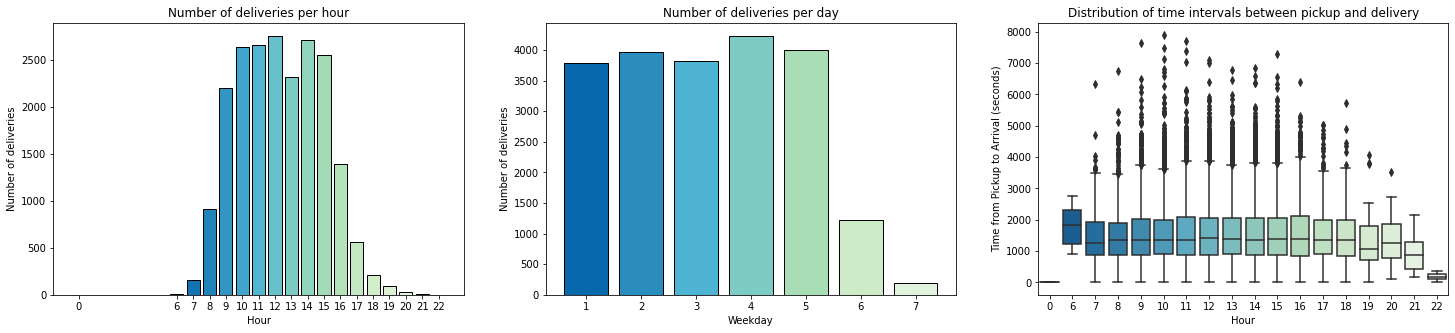

In [112]:
#Investigate when deliveries are typically made and how long they take
x = df.loc[:, ['pickup_hour', 'Order No']]
x = x.groupby(['pickup_hour'], as_index=False).count()

plt.subplot(1,3,1)
plt.bar(x['pickup_hour'], height=x['Order No'], color=sns.color_palette('GnBu_r', 17), edgecolor='black')
plt.title('Number of deliveries per hour')
plt.xlabel('Hour')
plt.xticks(x['pickup_hour'])
plt.ylabel('Number of deliveries')
fig = plt.gcf()
fig.set_size_inches(25, 5)

x = df.loc[:, ['Pickup - Weekday (Mo = 1)', 'Order No']]
x = x.groupby(['Pickup - Weekday (Mo = 1)'], as_index=False).count()

plt.subplot(1,3,2)
plt.bar(x['Pickup - Weekday (Mo = 1)'], height=x['Order No'], color=sns.color_palette('GnBu_r',7), edgecolor='black')
plt.title('Number of deliveries per day')
plt.xlabel('Weekday')
#plt.xticks(x['pickup_hour'])
plt.ylabel('Number of deliveries')
fig = plt.gcf()
fig.set_size_inches(25, 5)

plt.subplot(1,3,3)
sns.boxplot(x=df['pickup_hour'], y=df['Time from Pickup to Arrival'], palette='GnBu_r')
plt.title('Distribution of time intervals between pickup and delivery')
plt.xlabel('Hour')
plt.ylabel('Time from Pickup to Arrival (seconds)')
fig = plt.gcf()
fig.set_size_inches(25, 5)

plt.show()

Fig 5. Average number of deliveries (A) per day and (B) per week. (C) represents the length of taken for deliveries to reach their destination from pickup. The number of deliveries gradually increase from around 06:00 until peaking at roughly 2500 - 2700 deliveries per hour between 10:00 and 15:00 before tapering off again until 22:00. The majority of deliveries are made during the week (Monday to Friday) with the fewest made on Sundays. The median length time taken per delivery remains approximately equal during the day except for the early morning and late evening; however, there are numerous outliers present during the day showing delivery times in excess of one hour. This is to be expected considering that Nairobi has been listed as the worst city in Africa and fourth worst in the world on traffic congestion (https://www.localguidesconnect.com/t5/General-Discussion/Hacking-Nairobi-Traffic/td-p/1563559).

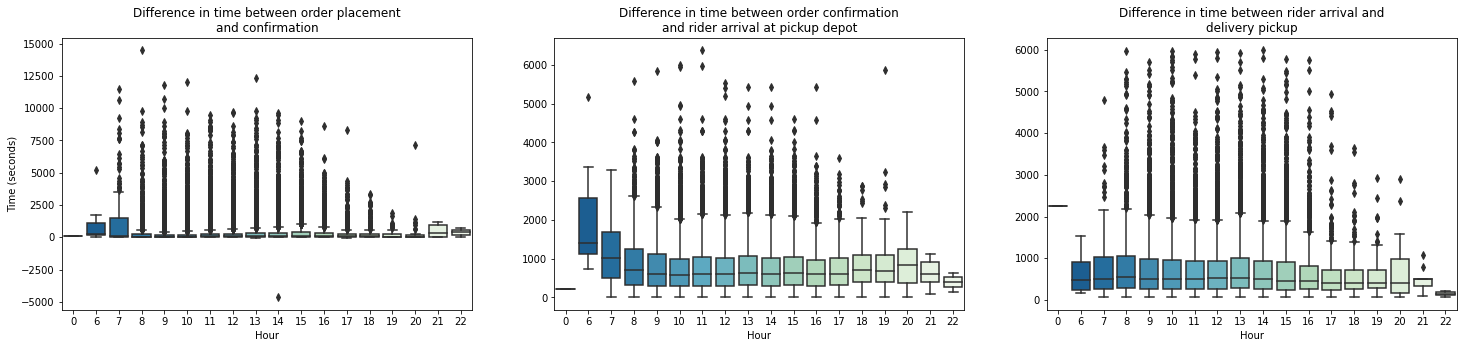

In [113]:
plt.subplot(1,3,1)
sns.boxplot(x=df['pickup_hour'], y=df['time_Con - Pl'], palette='GnBu_r')
plt.xlabel('Hour')
plt.ylabel('Time (seconds)')
plt.title("\n".join(wrap('Difference in time between order placement and confirmation', 45)))
fig = plt.gcf()
fig.set_size_inches(25, 5)

plt.subplot(1,3,2)
sns.boxplot(x=df['pickup_hour'], y=df['time_Arr P - Con'], palette='GnBu_r')
plt.xlabel('Hour')
plt.ylabel('')
plt.title("\n".join(wrap('Difference in time between order confirmation and rider arrival at pickup depot', 45)))
fig = plt.gcf()
fig.set_size_inches(25, 5)

plt.subplot(1,3,3)
sns.boxplot(x=df['pickup_hour'], y=df['time_P - Arr P'], palette='GnBu_r')
plt.xlabel('Hour')
plt.ylabel('')
plt.title("\n".join(wrap('Difference in time between rider arrival and delivery pickup', 45)))
fig = plt.gcf()
fig.set_size_inches(25, 5)

plt.show()

Fig 6. Distributions of time intervals between the placement of the order and the times marked by the riders for confirmation, arrival at pickup depot and pickup of delivery through the Sendy application. In all three graphs, the data shows a high proportion of outliers. It will be worthwhile to consider transforming these columns under data cleaning.

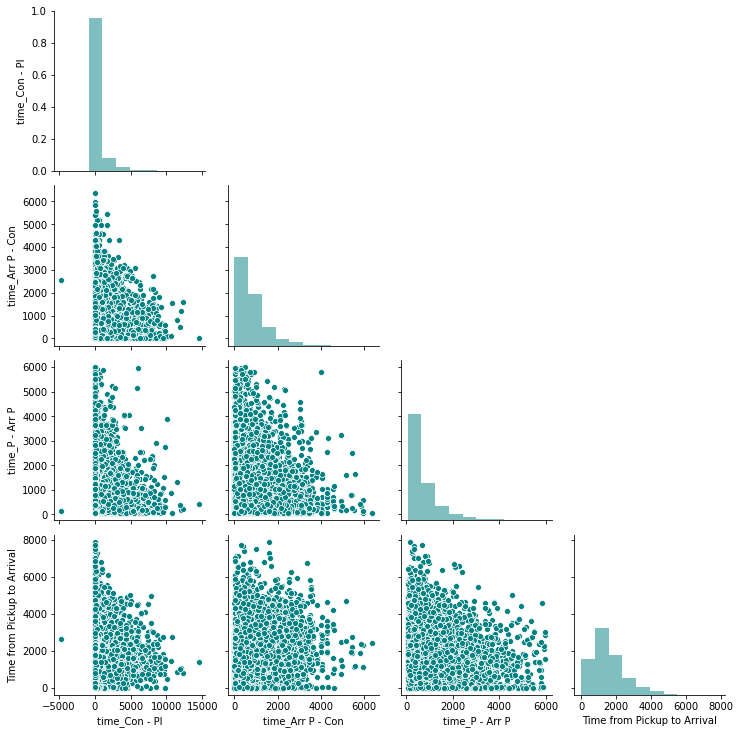

In [114]:
g = sns.PairGrid(df[['time_Con - Pl', 'time_Arr P - Con', 'time_P - Arr P', 'Time from Pickup to Arrival']])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
g.map_lower(sns.scatterplot, color='teal')
g.map_diag(plt.hist, color='teal', alpha=0.5)
plt.show()

Fig 7. Pairwise relationship of the intervals between the placement of the order and the times marked by the riders for confirmation, arrival at pickup depot and pickup of delivery. There is no obvious relationship between these data (see correlation matrix below). The presence of a negative time interval in 6A suggests an error in the data as the sequence of events cannot change, ie. the order cannot be confirmed before it has been placed.

In [115]:
df[['time_Con - Pl', 'time_Arr P - Con', 'time_P - Arr P', 'Time from Pickup to Arrival']].corr()

,time_Con - Pl,time_Arr P - Con,time_P - Arr P,Time from Pickup to Arrival
time_Con - Pl,1.000000,0.061309,0.006263,0.035489
time_Arr P - Con,0.061309,1.000000,-0.090843,0.178538
time_P - Arr P,0.006263,-0.090843,1.000000,-0.079637
Time from Pickup to Arrival,0.035489,0.178538,-0.079637,1.000000


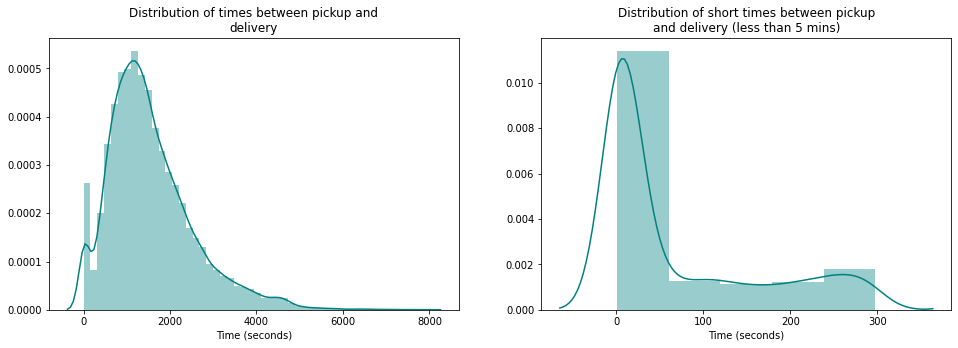

In [116]:
#Investigate distribution of the dependent variable (Time from Pickup to Arrival)
plt.subplot(1,3,1)
sns.distplot(df['Time from Pickup to Arrival'], bins = 50, kde=True, hist=True, color='teal')
plt.xlabel('Time (seconds)')
plt.ylabel('')
plt.title("\n".join(wrap('Distribution of times between pickup and delivery', 45)))
fig = plt.gcf()
fig.set_size_inches(25, 5)

#Investigate shortest time intervals (selected 5 mins as a limit)
short_deliveries = df[df['Time from Pickup to Arrival'] < 300]

plt.subplot(1,3,2)
sns.distplot(short_deliveries['Time from Pickup to Arrival'], bins = 5, kde=True, hist=True, color='teal')
plt.xlabel('Time (seconds)')
plt.ylabel('')
plt.title("\n".join(wrap('Distribution of short times between pickup and delivery (less than 5 mins)', 45)))
fig = plt.gcf()
fig.set_size_inches(25, 5)

Fig 8. Distribution of the responsible over time. (A) includes the whole dataset and shows a high proportion of values near 0 as well as a skewness to the right. (B) includes those time points that are under five minutes. The majority of this data appears to be under one minute which seems unlikely considering only 14% of deliveries have the same pickup and destination geohash.

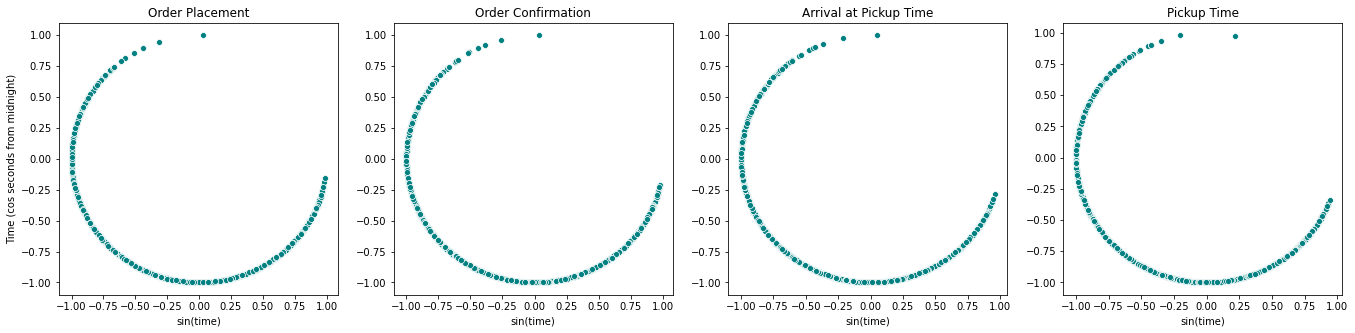

In [117]:
#Investigate cyclic time variables
plt.subplot(1, 4, 1)
sns.scatterplot(x=df['pl_sin'], y=df['pl_cos'], color='teal')
plt.title('Order Placement')
plt.xlabel('sin(time)')
plt.ylabel('Time (cos seconds from midnight)')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.subplot(1, 4, 2)
sns.scatterplot(x=df['con_sin'], y=df['con_cos'], color='teal')
plt.title('Order Confirmation')
plt.xlabel('sin(time)')
plt.ylabel('')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.subplot(1, 4, 3)
sns.scatterplot(x=df['arr p_sin'], y=df['arr p_cos'], color='teal')
plt.title('Arrival at Pickup Time')
plt.xlabel('sin(time)')
plt.ylabel('')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

plt.subplot(1, 4, 4)
sns.scatterplot(x=df['p_sin'], y=df['p_cos'], color='teal')
plt.title('Pickup Time')
plt.xlabel('sin(time)')
plt.ylabel('')
fig = plt.gcf()
fig.set_size_inches( 23, 5)

Fig 9. Distribution of order placement, confirmation, rider arrival at the pickup location and pickup of the shipment during the day. The graphs show that the activities are spread throughout the day but not overnight in each case and presents time as a cyclic feature.

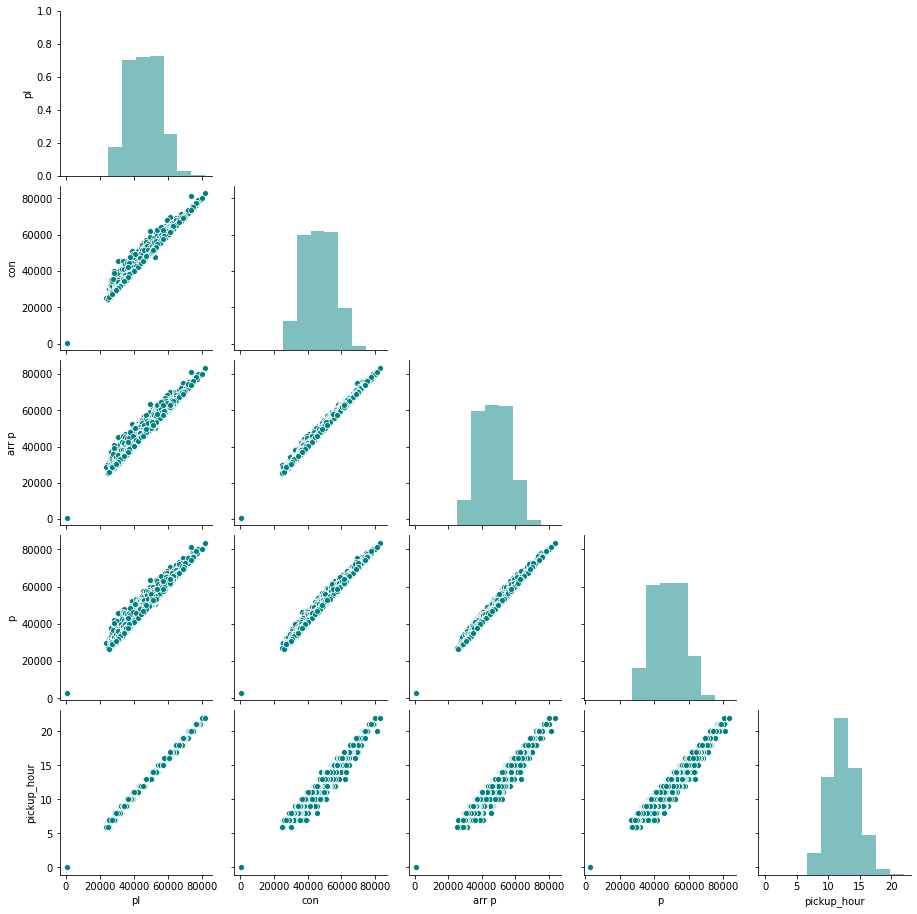

In [118]:
#Examine relationship between time columns
g = sns.PairGrid(df[['pl', 'con', 'arr p', 'p','pickup_hour']])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
g.map_lower(sns.scatterplot, color='teal')
g.map_diag(plt.hist, color='teal', alpha=0.5)
plt.show()

Fig 10. Pairwise relationship between the different time columns (seconds from midnight). There is a clear linear relationship between all features (see the correlation matrix below). To avoid multicollinearity between these variables, all but one will excluded from the training set.

In [119]:
df[['pl', 'con', 'arr p', 'p', 'pickup_hour']].corr()

,pl,con,arr p,p,pickup_hour
pl,1.000000,0.993682,0.990327,0.987326,0.993546
con,0.993682,1.000000,0.997171,0.994265,0.987195
arr p,0.990327,0.997171,1.000000,0.996532,0.983929
p,0.987326,0.994265,0.996532,1.000000,0.980935
pickup_hour,0.993546,0.987195,0.983929,0.980935,1.000000


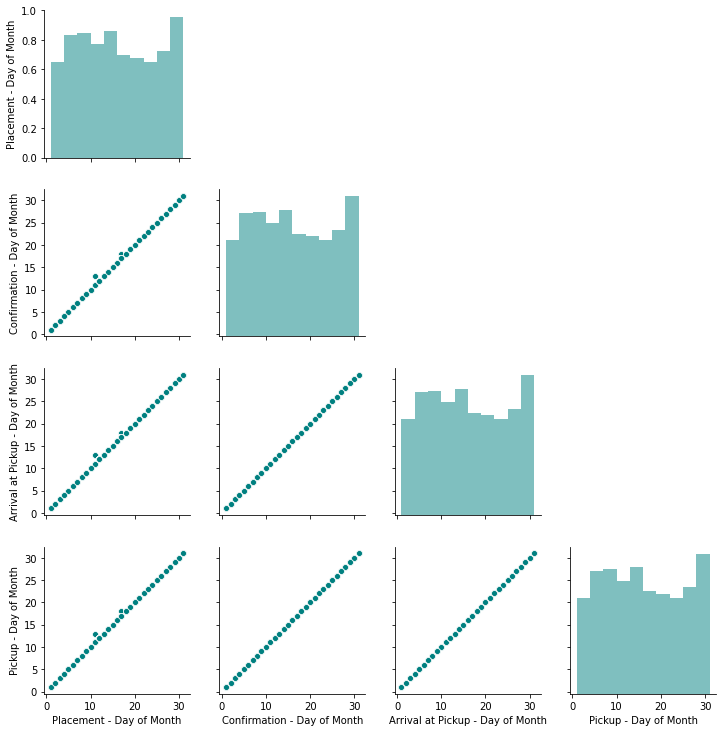

In [120]:
#Examine relationship between day of month columns
g = sns.PairGrid(df[['Placement - Day of Month', 'Confirmation - Day of Month', 'Arrival at Pickup - Day of Month', 'Pickup - Day of Month']])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
g.map_lower(sns.scatterplot, color='teal')
g.map_diag(plt.hist, color='teal', alpha=0.5)
plt.show()

Fig 11. Pairwise relationship between the different day of the month columns. There is a clear linear relationship between all features (see the correlation matrix below). To avoid multicollinearity between these variables, all but one will excluded from the training set.

In [121]:
df[['Placement - Day of Month', 'Confirmation - Day of Month', 'Arrival at Pickup - Day of Month', 'Pickup - Day of Month']].corr()

,Placement - Day of Month,Confirmation - Day of Month,Arrival at Pickup - Day of Month,Pickup - Day of Month
Placement - Day of Month,1.000000,0.999998,0.999998,0.999998
Confirmation - Day of Month,0.999998,1.000000,1.000000,1.000000
Arrival at Pickup - Day of Month,0.999998,1.000000,1.000000,1.000000
Pickup - Day of Month,0.999998,1.000000,1.000000,1.000000


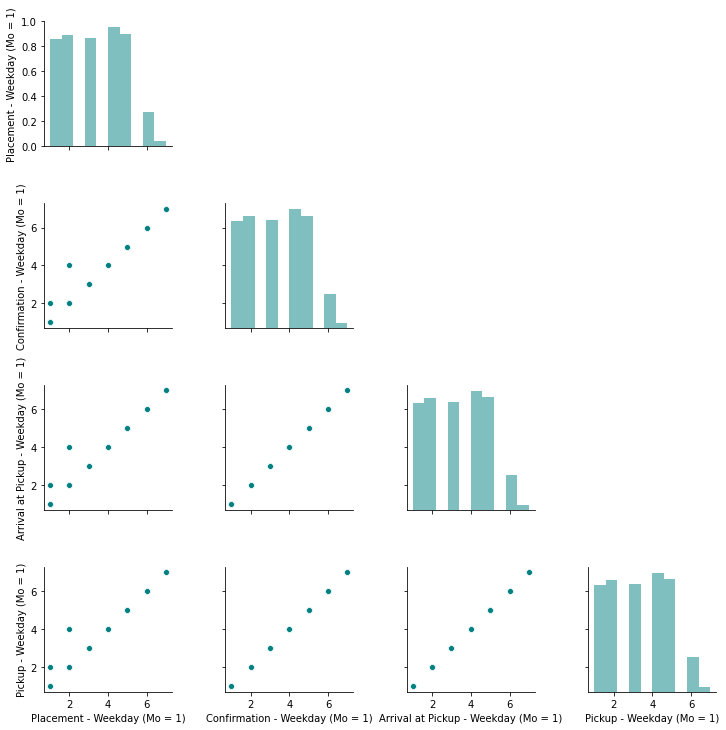

In [122]:
#Examine relationship between weekday columns
g = sns.PairGrid(df[['Placement - Weekday (Mo = 1)', 'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)']])
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
g.map_lower(sns.scatterplot, color='teal')
g.map_diag(plt.hist, color='teal', alpha=0.5)
plt.show()

Fig 12. Pairwise relationship between the different weekday columns. There is a clear linear relationship between all features (see the correlation matrix below). To avoid multicollinearity between these variables, all but one will excluded from the training set.

In [123]:
df[['Placement - Weekday (Mo = 1)', 'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Weekday (Mo = 1)']].corr()

,Placement - Weekday (Mo = 1),Confirmation - Weekday (Mo = 1),Arrival at Pickup - Weekday (Mo = 1),Pickup - Weekday (Mo = 1)
Placement - Weekday (Mo = 1),1.000000,0.999952,0.999952,0.999952
Confirmation - Weekday (Mo = 1),0.999952,1.000000,1.000000,1.000000
Arrival at Pickup - Weekday (Mo = 1),0.999952,1.000000,1.000000,1.000000
Pickup - Weekday (Mo = 1),0.999952,1.000000,1.000000,1.000000


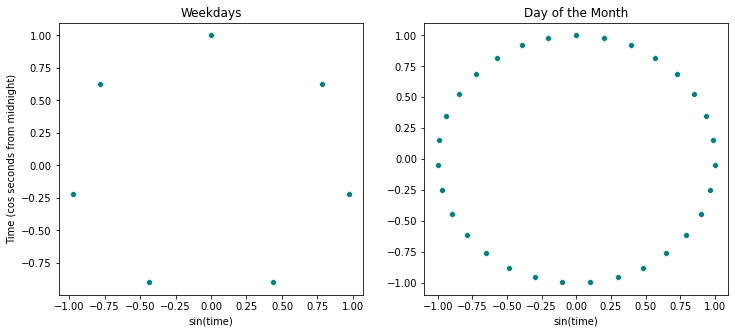

In [124]:
#Investigate cyclic day variables
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['weekday_p_sin'], y=df['weekday_p_cos'], color='teal')
plt.title('Weekdays')
plt.xlabel('sin(time)')
plt.ylabel('Time (cos seconds from midnight)')
fig = plt.gcf()
fig.set_size_inches( 12, 5)

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['month_p_sin'], y=df['month_p_cos'], color='teal')
plt.title('Day of the Month')
plt.xlabel('sin(time)')
plt.ylabel('')
fig = plt.gcf()
fig.set_size_inches( 12, 5)

Fig 13. Distribution of activities during the (A) week and (month). The graphs present time as a cyclic feature.

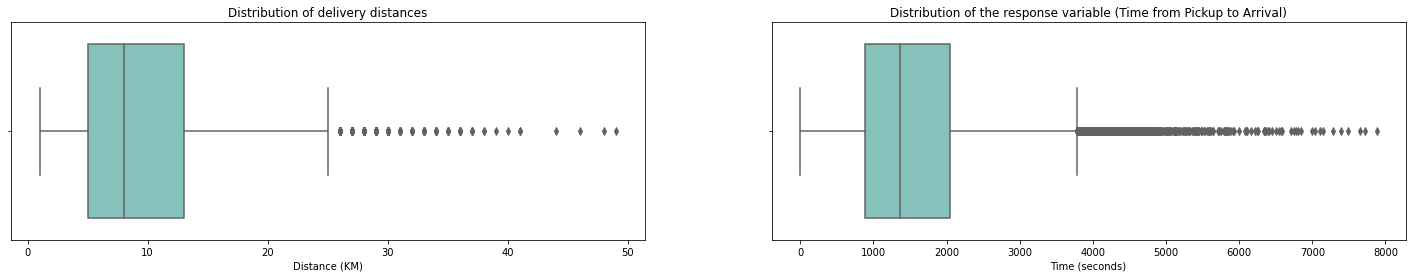

In [125]:
#Examine distribution of delivery distances
plt.subplot(1,2,1)
sns.boxplot(x=df['Distance (KM)'], palette='GnBu_r')
plt.title('Distribution of delivery distances')
fig = plt.gcf()
fig.set_size_inches(16, 4)

plt.subplot(1,2,2)
sns.boxplot(x=df['Time from Pickup to Arrival'], palette='GnBu_r')
plt.title('Distribution of the response variable (Time from Pickup to Arrival)')
plt.xlabel('Time (seconds)')
fig = plt.gcf()
fig.set_size_inches(25, 4)

plt.show()

Fig 14. Distribution of the (A) distances travelled between pickup and delivery and (B) the time interval between pickup and delivery. In both cases, there are a large number of outliers. For the distances travelled, this suggests that some orders may have been collected at a depot that is further than normal from the destination or a destination outside of the city. Please refer to the map for locations of pickup and drop off sites. In the case of time intervals, some of the outliers could be explained by traffic congestion although it is not possible to confirm this without additional data.

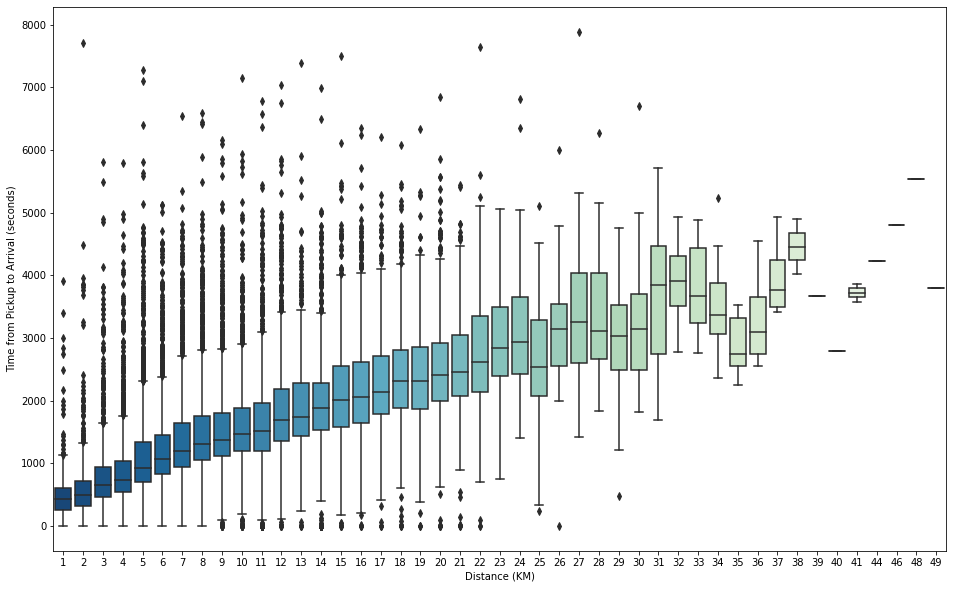

In [126]:
#Examine relationship between distance and dependent
sns.boxplot(x=df['Distance (KM)'], y=df['Time from Pickup to Arrival'], palette='GnBu_r')
plt.ylabel('Time from Pickup to Arrival (seconds)')
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.show()

Fig 15. Relationship between distance and the time taken from pickup to delivery. This result appears to show a linear relationship between the variables which is expected considering that increasing distance but not speed will increase travel time. The outliers observed during the day could be explained by traffic congestion in the city.

# Data Cleaning

In [0]:
#Drop rows that have negative time intervals (eg. not possible for the confirmation to happen before the order is placed)
ls = [col for col in df if col.startswith('time')]

for i in range(len(ls)):
    df = df.drop(df[df[ls[i]] <= 0].index)

In [0]:
#Drop rows that have a time from pickup to arrival under 5 min
df = df.drop(df[df['Time from Pickup to Arrival'] < 300].index)

In [0]:
#Drop confounding rider-related columns
#'Rider Id' is represented by the calculated 'ranking' column
#'Average_Rating' is a poor measure of rider rating because of the variable number of ratings that contribute to the score
#(ie. a rider with a single rating of 14.5 should not be ranked above a rider with an average rating of 14.2 from 1000+ ratings)
df = df.drop(['Rider Id', 'Average_Rating'], axis=1)

In [0]:
#Drop columns containing  datetime and geospatial data (not modified)
ls = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Pickup - Time', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long']

for i in range(len(ls)):
    df = df.drop(ls[i], axis=1)

In [0]:
#Drop all but one columns that show multicolinearity in weekday and day of the month variables as well as datetime columns
df['wkd'] = df['Pickup - Weekday (Mo = 1)']
df['mnth_day'] = df['Pickup - Day of Month']
df['wkd_sin'] = df['weekday_p_sin']
df['wkd_cos'] = df['weekday_p_cos']
df['mnth_sin'] = df['month_p_sin']
df['mnth_cos'] = df['month_p_cos']

ls = [col for col in df.columns if 'weekday' in col.lower()] + [col for col in df.columns if 'month' in col.lower()] + ['pl', 'con', 'arr p', 'p'] + ['pl_sin', 'con_sin', 'arr p_sin', 'p_sin'] + ['pl_cos', 'con_cos', 'arr p_cos', 'p_cos']

for i in range(len(ls)):
    df = df.drop(ls[i], axis=1)

In [0]:
#Drop rows that have speeds in excess of 100 km/h (max legal driving speed in cities in Kenya + 25% leeway)
df = df.drop(df[df['speed (km/h)'] > 100].index)

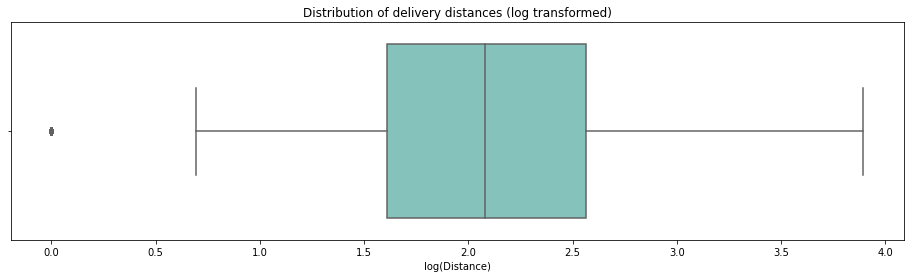

In [133]:
#Transform distance column
df['dist_tf'] = np.log(df['Distance (KM)'])
df = df.drop('Distance (KM)', axis=1)

sns.boxplot(x=df['dist_tf'], palette='GnBu_r')
plt.title('Distribution of delivery distances (log transformed)')
plt.xlabel('log(Distance)')
fig = plt.gcf()
fig.set_size_inches(16, 4)
plt.show()

Fig 16. Distribution of log transformed distance travelled. The data has been transformed to a more normal distribution.

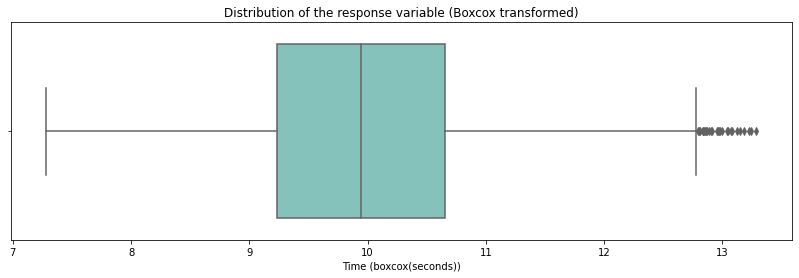

In [134]:
#Data shows many outliers to the right. Use boxcox transformation to adjust the y variable to a more normal distribution
from scipy.stats import boxcox
df['y_tf'] = boxcox(df['Time from Pickup to Arrival'])[0]

sns.boxplot(x=df['y_tf'], palette='GnBu_r')
plt.title('Distribution of the response variable (Boxcox transformed)')
plt.xlabel('Time (boxcox(seconds))')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

plt.show()

Fig 17. Distribution of boxcox transformed time intervals between pickup and delivery. The data is more normally distributed but still contains outliers to left.

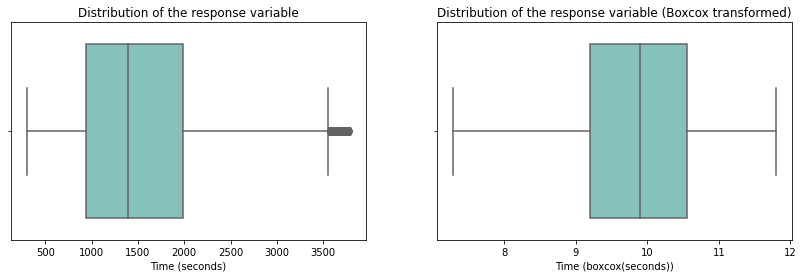

In [135]:
#There are still numerous outliers present in the data. Filter outliers using the IQR.

Q1 = df['Time from Pickup to Arrival'].quantile(0.25)
Q3 = df['Time from Pickup to Arrival'].quantile(0.75)
IQR = Q3 - Q1
df = df.drop(df[(df['Time from Pickup to Arrival'] < (Q1 - 1.5 * IQR)) | (df['Time from Pickup to Arrival'] > (Q3 + 1.5 * IQR))].index)

#Boxplot comparison after removing outliers

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Time from Pickup to Arrival'], palette='GnBu_r')
plt.title('Distribution of the response variable')
plt.xlabel('Time (seconds)')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['y_tf'], palette='GnBu_r')
plt.title('Distribution of the response variable (Boxcox transformed)')
plt.xlabel('Time (boxcox(seconds))')
fig = plt.gcf()
fig.set_size_inches( 14, 4)

plt.show()

Fig 18. Comparison between the distributions of the (A) untransformed and (B) boxcox transformed and IQR filtered time intervals between pickup and delivery. The data is more normally distributed but still contains outliers to left.

In [0]:
#Drop columns that will not be possible to calculate in test data
df = df.drop('speed (km/h)', axis=1)
df = df.drop('y_tf', axis=1)

In [0]:
#Move dependent variable to the end
df['Time from Pickup to Arrival'] = df.pop('Time from Pickup to Arrival')
df = df.set_index('Order No')

# Modelling

In [0]:
#Create the matrix of features.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [0]:
#Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Cross validation

In [140]:
#Evaluate the Root Mean Squared Error (RMSE) of different regressor models by cross-validation
random_state = 3
kf = KFold(n_splits=10, random_state=random_state, shuffle=True)
regressors = [LinearRegression(), Ridge(), Lasso(), SVR(), DecisionTreeRegressor(random_state=random_state), RandomForestRegressor(random_state=random_state), XGBRegressor(random_state=random_state), LGBMRegressor(random_state=random_state)]

scores = []
for i in range(len(regressors)):
    scores.append(np.sqrt(abs(cross_val_score(regressors[i], X_train, y_train, scoring='neg_mean_squared_error', cv=kf))).mean())

result = pd.DataFrame({'Algorithm': ['LM', 'Ridge', 'Lasso', 'SVR', 'DTR', 'RFR', 'XGBR', 'LGBM'], 'RMSE': scores})
result = result.sort_values("RMSE", ascending=True)

print(result)

[07:42:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:42:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:42:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:42:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:42:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:42:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:42:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [141]:
#Perform recursive feature elimination on the variables to identify best features for each of the top-performing models (LGBM, XGBR and RFR)
regressors = [RandomForestRegressor(random_state=random_state), XGBRegressor(random_state=random_state), LGBMRegressor(random_state=random_state)]

rfe = []
algorithms = ['RFR', 'XGBR', 'LGBM']
for i in range(len(regressors)):
  rfe.append(RFE(estimator=regressors[i]).fit(X_train, y_train).ranking_)

results = pd.DataFrame(rfe, index=algorithms, columns=X_train.columns).transpose()
print(results)


[07:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:47:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:48:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:48:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:48:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [0]:
#Select best features for the models to be tested
#model_features = ['User ID', 'Temperature', 'No_Of_Orders', 'Age', 'pickup_geohash', 'dest_geohash', 'time_Con - Pl', 'time_Arr P - Con', 'time_P - Arr P', 'ranking', 'deliveries_per_day', 'dist_tf', 'No_of_Ratings']

#X = df[model_features]
#y = df['Time from Pickup to Arrival']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [143]:
#Grid search for LGBM
params = {'n_estimators':[75, 95, 100, 125], 'num_leaves': [10, 20, 50, 75, 300], 'min_data_in_leaf': [50, 100, 250, 300, 500], 'learning_rate': [0.05, 0.1, 0.25], 'objective': ['regression']}
result_lgbm = GridSearchCV(estimator = LGBMRegressor(random_state=random_state), cv=kf,scoring='neg_mean_squared_error', param_grid=params).fit(X_train, y_train)
best = result_lgbm.best_params_
RMSE_lgbm = np.sqrt(abs(result_lgbm.best_score_))
print(result_lgbm.best_params_, np.sqrt(abs(result_lgbm.best_score_)))

{'learning_rate': 0.1, 'min_data_in_leaf': 300, 'n_estimators': 125, 'num_leaves': 20, 'objective': 'regression'} 565.260906904667


In [144]:
#Grid search for XGB
params = {'n_estimators': [75, 100, 125], 'min_data_in_leaf': [50, 100, 250, 300, 500], 'eta': [0.05, 0.1, 0.3], 'max_depth': [2, 4, 6]}
result_xgb = GridSearchCV(estimator = LGBMRegressor(random_state=random_state), cv=kf,scoring='neg_mean_squared_error', param_grid=params).fit(X_train, y_train)
best = result_xgb.best_params_
print(result_xgb.best_params_, np.sqrt(abs(result_xgb.best_score_)))

{'eta': 0.05, 'max_depth': 6, 'min_data_in_leaf': 100, 'n_estimators': 125} 565.8671326622406


In [145]:
#Grid search for RFR
params = {"max_depth":[None, 3, 6], "min_samples_split": [10], "min_samples_leaf": [3], "n_estimators": [75, 100 , 300]}
result_rfr = GridSearchCV(estimator = RandomForestRegressor(random_state=random_state), cv=kf,scoring='neg_mean_squared_error', param_grid=params).fit(X_train, y_train)
best = result_rfr.best_params_
print(result_rfr.best_params_, np.sqrt(abs(result_rfr.best_score_)))

{'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300} 580.1726406571502


# Processing of test data for Zindi submission

In [0]:
#DATA PREPROCESSING AND FEATURE ENGINEERING OF TESTING DATA

#Merge training data with rider data
test_data = pd.merge(test_data, riders, how='left', left_on=['Rider Id'], right_on=['Rider Id'])

#One hot encode 'Personal or Business' and 'Platform Type' columns.
test_data = pd.get_dummies(test_data, columns=['Personal or Business'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Platform Type'], drop_first=True)

#Label encode 'Id' columns
le3 = LabelEncoder()
le3.fit(test_data['User Id'])
test_data['User Id'] = le3.transform(test_data['User Id'])

#Label encode latitude and longitude columns
geo_df = test_data.loc[:, ['Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long']]
geo_df['pickup'] = 0
geo_df['dest'] = 0
for i in range(len(geo_df)):
    geo_df.iloc[i, 4] = pgh.encode(geo_df.iloc[i, 0], geo_df.iloc[i, 1], precision=6)
    geo_df.iloc[i, 5] = pgh.encode(geo_df.iloc[i, 2], geo_df.iloc[i, 3], precision=6)

#Transform geohash labels using the dictionary
geo_df['pickup_label'] = geo_df['pickup'].apply(lambda i: geohash_dict[i] if i in geohash_dict.keys() else 0)
geo_df['dest_label'] = geo_df['dest'].apply(lambda i: geohash_dict[i] if i in geohash_dict.keys() else 0)

#Add to df
test_data['pickup_geohash'] = geo_df['pickup_label']
test_data['dest_geohash'] = geo_df['dest_label']

#Transform time columns into 24 hour format

test_data['Placement - Time'] = pd.to_datetime(test_data['Placement - Time'], format='%I:%M:%S %p')
test_data['Confirmation - Time'] = pd.to_datetime(test_data['Confirmation - Time'], format='%I:%M:%S %p')
test_data['Arrival at Pickup - Time'] = pd.to_datetime(test_data['Arrival at Pickup - Time'], format='%I:%M:%S %p')
test_data['Pickup - Time'] = pd.to_datetime(test_data['Pickup - Time'], format='%I:%M:%S %p')

#6: Fill in missing temperature values

#Calculate mean temperature per hour
temp_adj = test_data.loc[:, ['Temperature', 'Placement - Time']]
temp_adj['hour'] = temp_adj['Placement - Time'].apply(lambda x: x.hour)
mean_temps = temp_adj.drop(temp_adj[temp_adj['Temperature'].isna()].index)
mean_temps = mean_temps.groupby(['hour'], as_index=False).mean()

#Replace nan Temperatures with mean per hour
a = test_data['Temperature'].isna()
for i in range(len(a)):
    if a.iloc[i] == True:
        temp_adj.iloc[i, 0] = mean_temps.loc[mean_temps['hour'] == temp_adj.iloc[i, 2], 'Temperature'].values[0]

test_data['Temperature'] = temp_adj['Temperature']

#Calculate interval in seconds between successive time columns. This format is the same as the given dependent variable, 'Time from Pickup to Arrival'
test_data['time_Con - Pl'] = (test_data['Confirmation - Time'] - test_data['Placement - Time']).astype('timedelta64[s]').astype(np.int64)
test_data['time_Arr P - Con'] = (test_data['Arrival at Pickup - Time'] - test_data['Confirmation - Time']).astype('timedelta64[s]').astype(np.int64)
test_data['time_P - Arr P'] = (test_data['Pickup - Time'] - test_data['Arrival at Pickup - Time']).astype('timedelta64[s]').astype(np.int64)

#Extract hour that rider picked up the shipment
test_data['pickup_hour'] = test_data['Placement - Time'].apply(lambda x: x.hour)

#Rank riders by rating and calculate average number of deliveries per day for each rider
total = sum(riders['No_of_Ratings'])
test_data['ranking'] = test_data['Average_Rating'] * test_data['No_of_Ratings'] / total
test_data['deliveries_per_day'] = test_data['No_Of_Orders'] / test_data['Age']

#Transform distance column
test_data['dist_tf'] = np.log(test_data['Distance (KM)'])

In [0]:
model_features=['User Id', 'Temperature', 'No_Of_Orders', 'Age', 'No_of_Ratings', 'pickup_geohash', 'dest_geohash', 'time_Con - Pl', 'time_Arr P - Con', 'time_P - Arr P', 'ranking', 'deliveries_per_day', 'pickup_hour', 'dist_tf']
X_test = test_data[model_features]
X_train = df[model_features]
y_train = df['Time from Pickup to Arrival']

regressor = LGBMRegressor(learning_rate=0.25, min_data_in_leaf=250, n_estimators=95, num_leaves=10, objective='regression', feature_fraction=0.9, bagging_fraction=0.9)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [157]:
predictions = pd.DataFrame({"Order No":test_data['Order No'], "Time from Pickup to Arrival": y_pred})
predictions.to_csv('submission_3_20200601.csv', index=False)
predictions.head()

,Order No,Time from Pickup to Arrival
0,Order_No_19248,1521.961079
1,Order_No_12736,1442.955232
2,Order_No_768,1236.946353
3,Order_No_15332,1055.696285
4,Order_No_21373,1448.274449


# Conclusion

The purpose of this project was to predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at final destination. This product will enhance customer communication, improve the reliability of Sendy's service and reduce the effect of logistics on the cost of manufactured goods. We have developed an LGBM regressor model and optimal features to realise this solution. This model has been tested on data provided by Sendy and has produced a best root mean square error score of 753.58. The solution will enable Sendy to realise cost savings, and ultimately reduce the cost of doing business, through improved resource management and planning for order scheduling.